In [1]:
import torch
import numpy as np
import pandas as pd
from torch import nn
import cnn_utils
import matplotlib.pyplot as plt

c:\Programy\anaconda3\envs\Torch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load data

In [2]:
train_loader, val_loader = cnn_utils.load_data("Data\\train.csv", 28, 28)

## Neural network

### Setting device

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


### Model's definition
Lenet5 neural net from: https://machinelearningmastery.com/handwritten-digit-recognition-with-lenet5-model-in-pytorch/

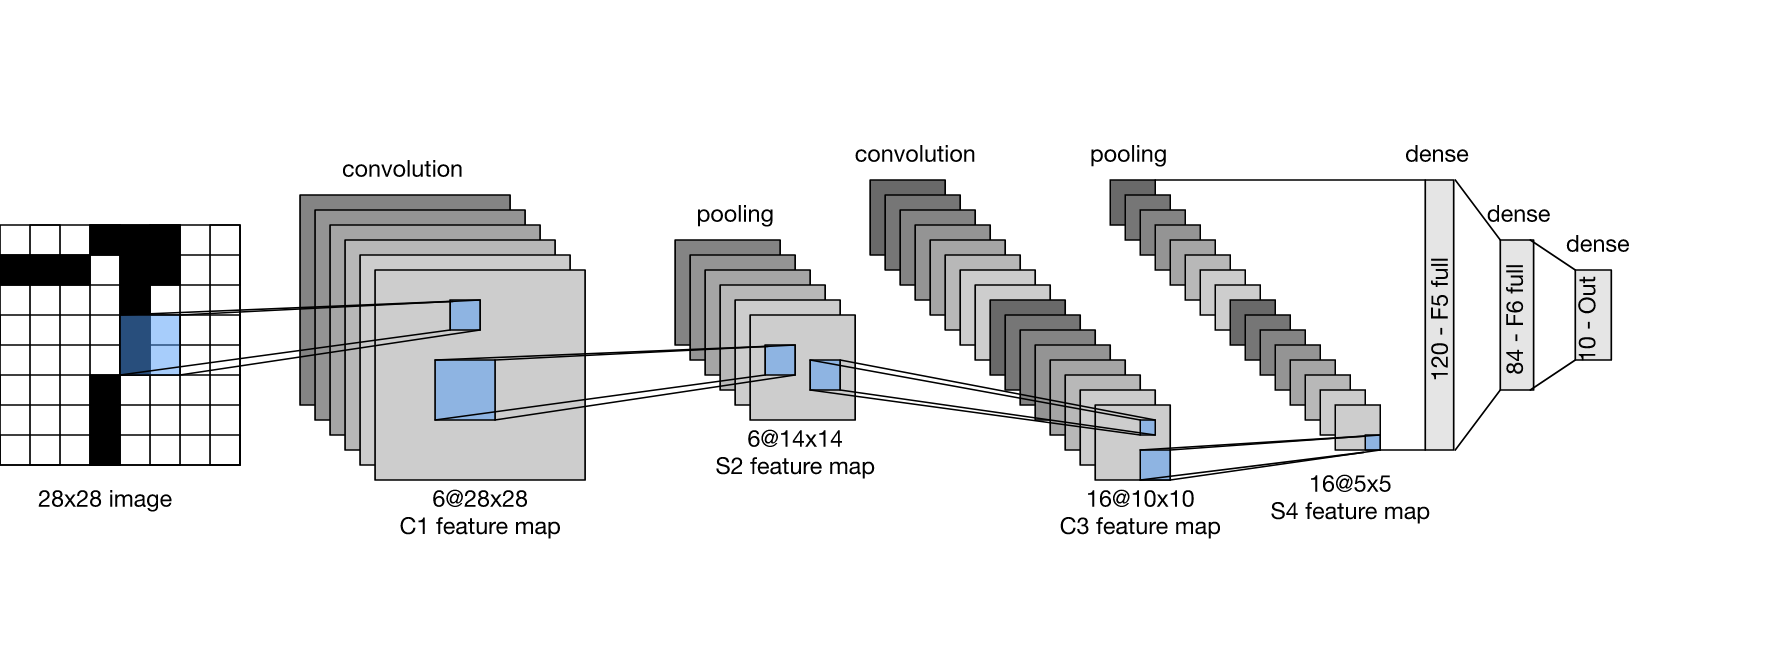
Image source: https://d2l.ai/chapter_convolutional-neural-networks/lenet.html

In [4]:
import torch.optim as optim
 
class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.act1 = nn.Tanh()
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
 
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0)
        self.act2 = nn.Tanh()
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
 
        self.conv3 = nn.Conv2d(16, 120, kernel_size=5, stride=1, padding=0)
        self.act3 = nn.Tanh()
 
        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(1*1*120, 84)
        self.act4 = nn.Tanh()
        self.fc2 = nn.Linear(84, 10)
        
    def forward(self, x):
        # input 1x28x28, output 6x28x28
        x = self.act1(self.conv1(x))
        # input 6x28x28, output 6x14x14
        x = self.pool1(x)
        # input 6x14x14, output 16x10x10
        x = self.act2(self.conv2(x))
        # input 16x10x10, output 16x5x5
        x = self.pool2(x)
        # input 16x5x5, output 120x1x1
        x = self.act3(self.conv3(x))
        # input 120x1x1, output 84
        x = self.act4(self.fc1(self.flat(x)))
        # input 84, output 10
        x = self.fc2(x)
        return x

### Training process

In [5]:
def training(model, train_loader, val_loader, optimizer, loss_fn, n_epochs):
    accs = []
    for epoch in range(n_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            y_pred = model(X_batch.to(device))
            loss = loss_fn(y_pred, y_batch.to(device))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # Validation
        model.eval()
        acc = 0
        count = 0
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch.to(device))
            acc += (torch.argmax(y_pred, 1) == y_batch.to(device)).float().sum()
            count += len(y_batch)
        acc = acc / count
        print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))
        accs.append(acc.item())

    return accs

Epoch 0: model accuracy 97.05%
Epoch 1: model accuracy 97.75%
Epoch 2: model accuracy 98.23%
Epoch 3: model accuracy 98.33%
Epoch 4: model accuracy 98.42%
Epoch 5: model accuracy 98.46%
Epoch 6: model accuracy 98.44%
Epoch 7: model accuracy 98.50%
Epoch 8: model accuracy 98.38%
Epoch 9: model accuracy 98.51%
Epoch 10: model accuracy 98.49%
Epoch 11: model accuracy 98.51%
Epoch 12: model accuracy 98.55%
Epoch 13: model accuracy 98.75%
Epoch 14: model accuracy 98.69%
Epoch 15: model accuracy 98.51%
Epoch 16: model accuracy 98.40%
Epoch 17: model accuracy 98.36%
Epoch 18: model accuracy 98.45%
Epoch 19: model accuracy 98.37%


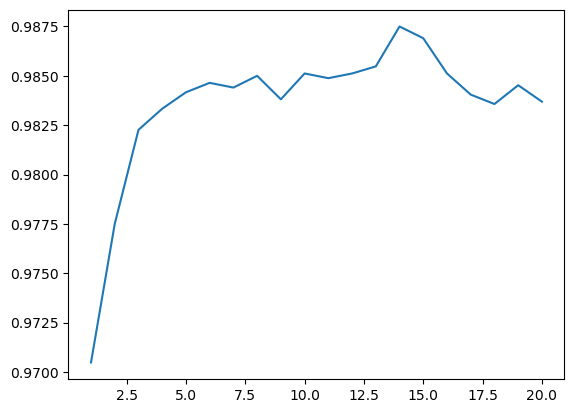

In [6]:
model = LeNet5()
model = model.to(device)
 
optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()

n_epochs = 20

accs = training(model, train_loader, val_loader, optimizer, loss_fn, n_epochs)
cnn_utils.plot_acc(accs)

### Zoomed data

In [7]:
train_loader, val_loader = cnn_utils.load_data("Data\\train_zoomed.csv", 28, 28)

Epoch 0: model accuracy 96.31%
Epoch 1: model accuracy 97.39%
Epoch 2: model accuracy 97.79%
Epoch 3: model accuracy 97.78%
Epoch 4: model accuracy 97.91%
Epoch 5: model accuracy 97.93%
Epoch 6: model accuracy 98.09%
Epoch 7: model accuracy 98.08%
Epoch 8: model accuracy 98.60%
Epoch 9: model accuracy 98.25%
Epoch 10: model accuracy 98.39%
Epoch 11: model accuracy 98.63%
Epoch 12: model accuracy 98.59%
Epoch 13: model accuracy 98.08%
Epoch 14: model accuracy 98.31%
Epoch 15: model accuracy 98.24%
Epoch 16: model accuracy 98.47%
Epoch 17: model accuracy 98.25%
Epoch 18: model accuracy 98.30%
Epoch 19: model accuracy 98.67%


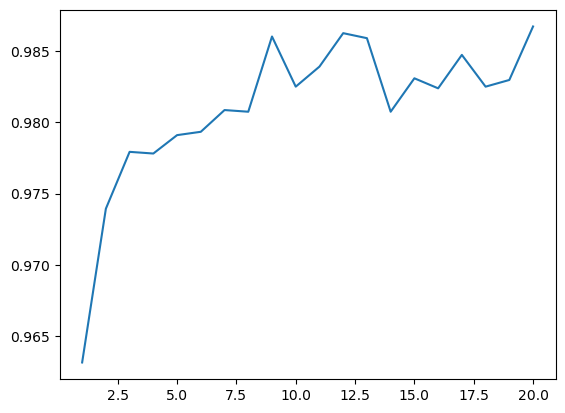

In [8]:
model = LeNet5()
model = model.to(device)
 
optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()

n_epochs = 20

accs = training(model, train_loader, val_loader, optimizer, loss_fn, n_epochs)
cnn_utils.plot_acc(accs)